# **Лабораторная работа №10** "Полиномиальная регрессия"
# **Выполнил: Дякин Владимир; группа: ПИН-б-о-22-1**

## Ссылка на используемый датасет: https://www.kaggle.com/datasets/yasserh/advertising-sales-dataset

## **Первичный анализ**

### Общее описание набора данных "Advertising Sales Dataset"

Этот набор данных содержит информацию о продажах рекламы в различных источниках. Он включает 200 экземпляров с 4 признаками, все из которых являются численными.

### Описание признаков

1. **TV** - бюджет рекламы на телевидении, в тыс. долл.
2. **Radio** - бюджет рекламы на радио, в тыс. долл.  
3. **Newspaper** - бюджет рекламы в газетах, в тыс. долл.
4. **Sales** - объем продаж, в тыс. долл.

### Характеристики данных

- Количество элементов (Instances): 200
- Количество признаков (Features): 4
- Связанные задачи: Регрессия
- Характеристики набора данных: Многомерные (Multivariate)
- Тип признаков: Численные (Numeric)

### Распределение данных

Поскольку данный набор данных предназначен для задачи регрессии, в нем нет информации о распределении классов. Вместо этого нужно провести анализ статистических характеристик числовых признаков, таких как:

- Среднее значение
- Медиана
- Стандартное отклонение
- Минимальное и максимальное значения
- Гистограммы распределения

Это поможет понять характер и особенности данных, что в свою очередь позволит выбрать подходящие методы моделирования.

Таким образом, данный набор данных "Advertising Sales Dataset" представляет интерес для разработки и оценки моделей регрессии, прогнозирующих объем продаж на основе бюджетов рекламы в различных источниках.

## Задание

Импорт необходимых библиотек для работы с данными (Pandas, NumPy), визуализацией (Matplotlib).

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

Чтение данных из файла "advertising_sales.csv" в Pandas DataFrame dataset и вывод первых 5 строк данных.

In [9]:
dataset = pd.read_csv('advertising_sales.csv')
dataset.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Разделение данных из DataFrame на матрицу признаков X и зависимую переменную y, с выводом их на экран.

In [23]:
X = dataset.iloc[:, 1:4].values
X1 = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 4].values
print ("Матрица признаков"); print(X[:5])
print ("Зависимая переменная"); print(y[:5])

Матрица признаков
[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]]
Зависимая переменная
[22.1 10.4  9.3 18.5 12.9]


Инициализация и обучение линейной регрессионной модели на наборе данных `X_train` и `y_train`.

In [24]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X1, y)

LinearRegression()

Создание полиномиальных признаков степени 10 и обучения модели линейной регрессии на этих признаках, что позволяет учесть нелинейные зависимости между признаками и целевой переменной.

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 10)
X_poly = poly_reg.fit_transform(X1)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

Прогнозирование с помощью обученных моделей линейной регрессии lin_reg и полиномиальной регрессии lin_reg_2 на значении признака 6.5.

In [26]:
y_pred_lin = lin_reg.predict([[6.5]])
y_pred_poly = lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
print(y_pred_lin, y_pred_poly)

[7.34158171] [8.85601298]


Построение графика для визуализации результатов модели линейной регрессии.

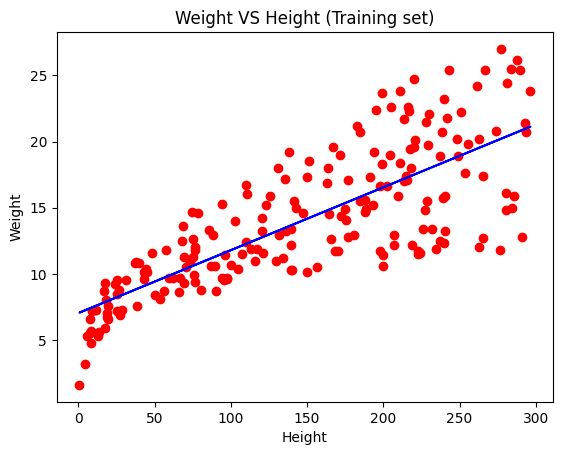

In [35]:
plt.scatter(X1, y, color = 'red')
plt.plot(X1, lin_reg.predict(X1), color = 'blue')
plt.title('Weight VS Height (Training set)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

Построение графика для визуализации результатов полиномиальной регрессии.

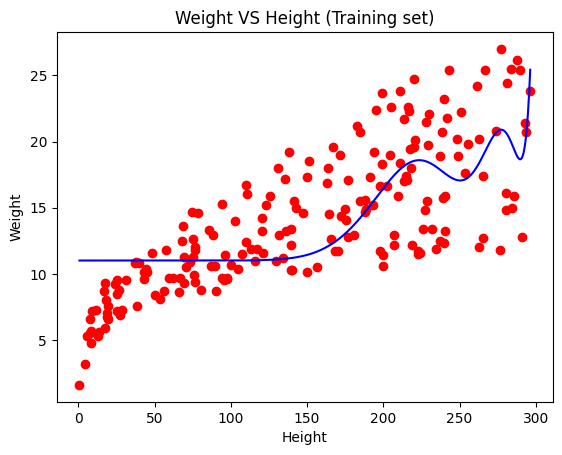

In [36]:
X_grid = np.arange(min(X1), max(X1), 0.2)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X1, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Weight VS Height (Training set)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

Изменим степень апроксимирующего полинома с 10 до 5

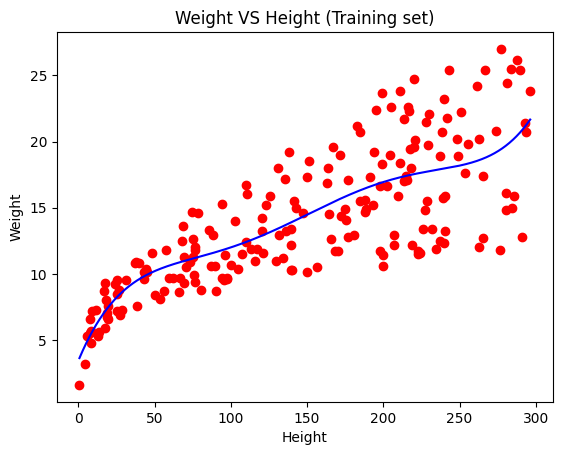

In [37]:
poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(X1)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

X_grid = np.arange(min(X1), max(X1), 0.2)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X1, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Weight VS Height (Training set)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

Изменим степень апроксимирующего полинома с 5 до 2

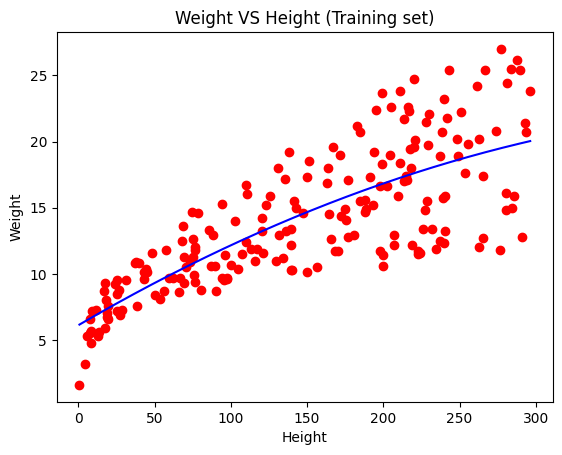

In [38]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X1)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

X_grid = np.arange(min(X1), max(X1), 0.2)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X1, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Weight VS Height (Training set)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

Изменим степень апроксимирующего полинома с 2 до 20

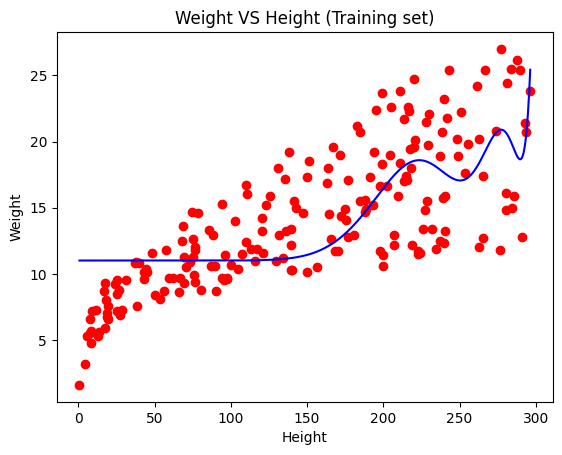

In [39]:
poly_reg = PolynomialFeatures(degree = 20)
X_poly = poly_reg.fit_transform(X1)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

X_grid = np.arange(min(X1), max(X1), 0.2)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X1, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Weight VS Height (Training set)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

## Контрольные вопросы

### **1. Почему при реализации многомерной линейной регрессии необходимо добавить фиктивный признак с единственным значением 1.0?**

При реализации многомерной линейной регрессии необходимо добавить фиктивный признак с единственным значением 1.0 для того, чтобы учесть свободный член (intercept) в модели. Этот фиктивный признак обеспечивает моделирование константного члена уравнения регрессии, который представляет собой значение зависимой переменной, когда все независимые переменные равны нулю. Без этого фиктивного признака модель может быть неправильно интерпретирована и дать неверные результаты, поэтому его добавление является важным шагом при работе с многомерной линейной регрессией.

### **2. Что такое фиктивная переменная? Опишите причину удаления одной фиктивной переменной, возникающей при перекодировке категориального признака.**

Фиктивная переменная (dummy variable) - это бинарная переменная, которая используется для представления категориальных данных в регрессионных моделях. Она принимает значение 0 или 1, чтобы закодировать принадлежность к определенной категории.

При перекодировке категориального признака с \(k\) уровнями (категорий) в \(k\) фиктивных переменных, обычно удаляется одна из фиктивных переменных. Этот метод называется "One-Hot Encoding".

Причина удаления одной из фиктивных переменных заключается в избежании мультиколлинеарности в модели. Мультиколлинеарность возникает, когда две или более независимые переменные в модели сильно коррелируют друг с другом. При использовании \(k\) фиктивных переменных для кодирования категориального признака, удаление одной переменной позволяет избежать линейной зависимости между переменными и улучшает интерпретируемость и стабильность модели.

### **3. С использованием какого класса создается модель полиномиальной регрессии?**

Модель полиномиальной регрессии создается с использованием класса PolynomialFeatures из библиотеки scikit-learn в Python. Этот класс позволяет генерировать новые признаки путем преобразования исходных признаков в полиномиальные комбинации.

### **4. Опишите принципы преобразования признаков при построении полиномиальной регрессии.**

При построении полиномиальной регрессии принципы преобразования признаков заключаются в следующем:

1. Добавление степеней признаков: Исходные признаки преобразуются путем возведения в различные степени, такие как квадраты, кубы и т.д. Это позволяет модели учитывать нелинейные зависимости между признаками и целевой переменной.

2. Создание взаимодействий между признаками: Путем создания комбинаций различных признаков в виде их произведений можно учесть взаимодействия между признаками, что также помогает модели улучшить предсказательную способность.

3. Регулирование сложности модели: При построении полиномиальной регрессии важно учитывать степень полинома, так как увеличение степени может привести к переобучению модели. Необходимо подбирать оптимальную степень полинома с учетом компромисса между точностью и сложностью модели.

4. Масштабирование признаков: При использовании полиномиальной регрессии важно масштабировать признаки, чтобы обеспечить стабильность и эффективность работы алгоритма. Масштабирование помогает улучшить сходимость модели и предотвратить проблемы с численной устойчивостью.

Эти принципы преобразования признаков при построении полиномиальной регрессии помогают модели лучше аппроксимировать сложные нелинейные зависимости в данных и улучшить ее способность к прогнозированию.

### **5.Возможно ли применение технологии масштабирования признаков при реализации полиномиальной регрессии?**

Да, применение технологии масштабирования признаков является возможным и рекомендуемым при реализации полиномиальной регрессии. Масштабирование признаков помогает улучшить производительность и стабильность модели полиномиальной регрессии. Важно применять масштабирование, особенно когда признаки имеют различные диапазоны значений или разные единицы измерения. 

Преимущества масштабирования признаков при реализации полиномиальной регрессии включают:
- Улучшение сходимости модели: Масштабирование помогает ускорить сходимость алгоритма оптимизации и улучшить его стабильность.
- Предотвращение проблем с численной устойчивостью: Масштабирование признаков помогает предотвратить проблемы, связанные с численной неустойчивостью при вычислениях.
- Улучшение интерпретируемости модели: Масштабирование признаков позволяет лучше интерпретировать веса признаков и их влияние на целевую переменную.

Таким образом, применение технологии масштабирования признаков является важным шагом при работе с полиномиальной регрессией для достижения лучших результатов моделирования.

## Вывод

Был разработан пайплайн для тиражирования кода с целью решения задачи полиномиальной регрессии. Получены навыки рефакторинга кода в проектах машинного обучения. Изучено поведение модели полиномиальной регрессии при изменении степени полинома. Освоены модификации.